# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to explore the city of Calgary.

This will act as a playbook for newcomers and people already residing in the city.

We will use our data science skills to explore, segment and cluster the nieghborhoods in the city of Calgary

## Data <a name="data"></a>

My Data:

* list of neigborhood in the city of Calgary - Wikipedia
* Foursquare API to explore the neighborhoods and get the most common venue categories in each neighborhood
* *k*-means clustering algorithm was used to complete this task. 
* Folium library to visualize the neighborhoods in the City of Calgary and their emerging clusters.

## Importing Libaries <a name="import libaries"></a>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge bs4 --yes

!conda install -c conda-forge geocoder --yes

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

## Web Scrapping

In [2]:
import bs4 as bs
import urllib.request

In [3]:
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary')
soup = bs.BeautifulSoup(source,'html.parser')

In [4]:
table = soup.find('table', class_='wikitable')
table_rows = table.find_all('tr')

In [6]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        l.append(row)
df=pd.DataFrame(l)

## Data Cleaning 

In [10]:
df_new = df.drop(columns=[1, 3,4,5,6,7,8,9,10,11])

In [15]:
df_cal = df_new.rename(columns={0: "Neighborhood", 2: "Borough"})
df_cal.head()

,Neighborhood,Borough
0,Abbeydale,Northeast
1,Acadia,South
2,Albert Park/Radisson Heights,East
3,Altadore,Centre
4,Alyth/Bonnybrook,Centre


## Methodology <a name="methodology"></a>

In [16]:
df_cal.shape

(257, 2)

There are a total of 257 Neighborhoods in Calgary, Alberta

In [17]:
import matplotlib.pyplot as plt

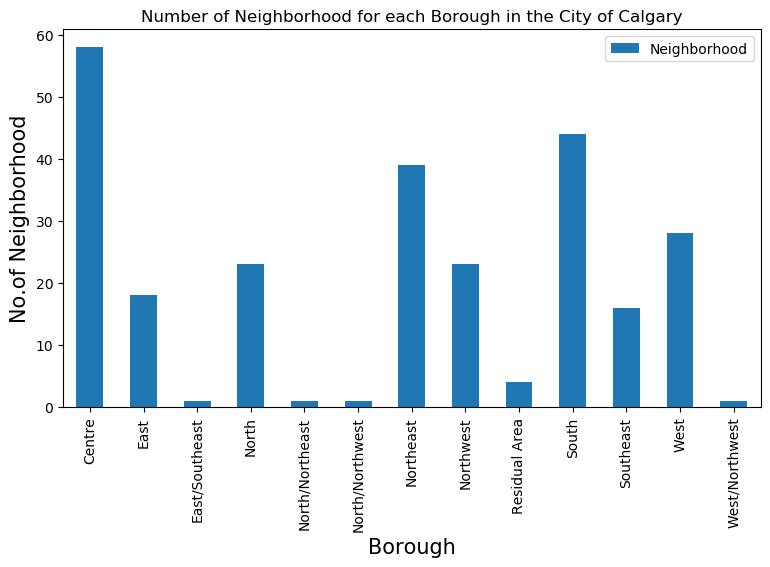

In [18]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in the City of Calgary')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_cal.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [27]:
df_cal.groupby('Borough')['Neighborhood'].count()

Borough
Centre             58
East               18
East/Southeast      1
North              23
North/Northeast     1
North/Northwest     1
Northeast          39
Northwest          23
Residual Area       4
South              44
Southeast          16
West               28
West/Northwest      1
Name: Neighborhood, dtype: int64

## Using Geocoder to get Longitude and Latitude 

In [28]:
import geocoder # import geocoder
# initialize your variable to None

def get_latilong(city_name):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Calgary, Alberta'.format(city_name))
        lati_long_coords = g.latlng
    return lati_long_coords
    

get_latilong('Abbeydale')

[51.05976000000004, -113.92545999999999]

In [29]:
city_names = df_cal['Neighborhood']
cal_cord = [ get_latilong(city_name) for city_name in city_names.tolist() ]

In [35]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(cal_cord, columns=['Latitude', 'Longitude'])
df_cal['Latitude'] = df_coords['Latitude']
df_cal['Longitude'] = df_coords['Longitude']

In [34]:
df_cal[df_cal.Neighborhood == 'Abbeydale']

,Neighborhood,Borough,Latitude,Longitude
0,Abbeydale,Northeast,51.05976,-113.92546


In [33]:
df_cal.head()

,Neighborhood,Borough,Latitude,Longitude
0,Abbeydale,Northeast,51.05976,-113.92546
1,Acadia,South,50.97227,-114.05843
2,Albert Park/Radisson Heights,East,51.04200,-113.99683
3,Altadore,Centre,51.01601,-114.10558
4,Alyth/Bonnybrook,Centre,51.01155,-114.04481


In [25]:
address = 'Calgary, Alberta'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Calgary, Alberta are {}, {}.'.format(latitude_x, longitude_y))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The Geograpical Co-ordinate of Calgary, Alberta are 51.0534234, -114.0625892.


## Using Folium to create a Map of Calgary 

In [42]:
map_calgary = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_cal['Latitude'], df_cal['Longitude'], df_cal['Borough']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        height=200,
        width=200,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

Utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [43]:
CLIENT_ID = 'U3NT5ZQZB5WCWP2DIXLNKYLP12RGH5RBWJJ2G4JTBAPAR524'
CLIENT_SECRET = '3TPW23EWRH2A1K0GX1AKRXC1WYZB43ULY5S5YV4MIDN5YCCX'
VERSION = '20180604'

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT=50
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
calgaryVenue = getNearbyVenues(names=df_cal['Neighborhood'],
                                   latitudes=df_cal['Latitude'],
                                   longitudes=df_cal['Longitude']
                                  )

Abbeydale
Acadia
Albert Park/Radisson Heights
Altadore
Alyth/Bonnybrook
Applewood Park
Arbour Lake
Aspen Woods
Auburn Bay
Aurora Business Park
Banff Trail
Bankview
Bayview
Beddington Heights
Bel-Aire
Beltline
Bonavista Downs
Bowness
Braeside
Brentwood
Bridgeland/Riverside
Bridlewood
Britannia
Burns Industrial
Calgary International Airport
Cambrian Heights
Canada Olympic Park
Canyon Meadows
Capitol Hill
Castleridge
Cedarbrae
CFB Currie
CFB Lincoln Park PMQ
Chaparral
Charleswood
Chinatown
Chinook Park
Christie Park
Citadel
Cityscape[2]
Cliff Bungalow
Coach Hill
Collingwood
Copperfield
Coral Springs
Cougar Ridge
Country Hills
Country Hills Village
Coventry Hills
Cranston
Crescent Heights
Crestmont
Dalhousie
Deer Ridge
Deer Run
Deerfoot Business Centre
Diamond Cove
Discovery Ridge
Douglasdale/Glen
Dover
Downtown Commercial Core
Downtown East Village
Downtown West End
Eagle Ridge
East Fairview Industrial
East Shepard Industrial
Eastfield
Eau Claire
Edgemont
Elbow Park
Elboya
Erin Woods
Erlt

In [46]:
calgaryVenue.shape

(2416, 7)

In [47]:
calgaryVenue.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeydale,51.05976,-113.92546,Vanity Fitness,51.062982,-113.926238,Health & Beauty Service
1,Acadia,50.97227,-114.05843,Acadia Aquatic & Fitness Centre,50.973297,-114.059984,Gym / Fitness Center
2,Acadia,50.97227,-114.05843,Acadia Recreational Center,50.972256,-114.065077,Recreation Center
3,Albert Park/Radisson Heights,51.04200,-113.99683,Sugar Tree Cleaning Company,51.044662,-113.997207,Home Service
4,Altadore,51.01601,-114.10558,Garrison Pub,51.016131,-114.108674,Pub


In [48]:
calgaryVenue.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2411,Woodbine,50.94076,-114.12887,Wildman BBQ & Juke Joint,50.940522,-114.135654,BBQ Joint
2412,Woodlands,50.94207,-114.10683,3 Crowns,50.940765,-114.109430,Pub
2413,Woodlands,50.94207,-114.10683,Russian Store,50.941063,-114.109452,Food & Drink Shop
2414,Woodlands,50.94207,-114.10683,Mac's,50.940876,-114.109816,Food & Drink Shop
2415,Woodlands,50.94207,-114.10683,A Buyer's Choice Home Inspections,50.941854,-114.100715,Shop & Service


In [49]:
calgaryVenue.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbeydale,1,1,1,1,1,1
Acadia,2,2,2,2,2,2
Albert Park/Radisson Heights,1,1,1,1,1,1
Altadore,4,4,4,4,4,4
Alyth/Bonnybrook,4,4,4,4,4,4
Applewood Park,3,3,3,3,3,3
Arbour Lake,5,5,5,5,5,5
Aspen Woods,9,9,9,9,9,9
Auburn Bay,4,4,4,4,4,4


In [51]:
print('There are {} unique categories.'.format(len(calgaryVenue['Venue Category'].unique())))

There are 225 unique categories.


In [55]:
# one hot encoding
calgary_onehot = pd.get_dummies(calgaryVenue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = calgaryVenue['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [calgary_onehot.columns[-1]] + list(calgary_onehot.columns[:-1])
calgary_onehot = calgary_onehot[fixed_columns]

calgary_onehot.head()

,Yoga Studio,ATM,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Intersection,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Plaza,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abbeydale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acadia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
calgary_onehot.shape

(2416, 225)

In [58]:
calgary_grouped = calgary_onehot.groupby('Neighborhood').mean().reset_index()
calgary_grouped.head()

,Neighborhood,Yoga Studio,ATM,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Intersection,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Plaza,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Abbeydale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [59]:
calgary_grouped.tail()

,Neighborhood,Yoga Studio,ATM,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Inn,Intersection,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Plaza,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Student Center,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store
225,Willow Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [60]:
calgary_grouped.shape

(230, 225)

In [62]:
topVenues = 5

for hood in calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = calgary_grouped[calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(topVenues))
    print('\n')

----Abbeydale----
                     venue  freq
0  Health & Beauty Service   1.0
1              Yoga Studio   0.0
2          Paintball Field   0.0
3          Motorcycle Shop   0.0
4            Movie Theater   0.0


----Acadia----
                  venue  freq
0  Gym / Fitness Center   0.5
1     Recreation Center   0.5
2       Paintball Field   0.0
3       Motorcycle Shop   0.0
4         Movie Theater   0.0


----Albert Park/Radisson Heights----
             venue  freq
0     Home Service   1.0
1      Yoga Studio   0.0
2  Paintball Field   0.0
3  Motorcycle Shop   0.0
4    Movie Theater   0.0


----Altadore----
                   venue  freq
0                    Pub  0.25
1         Ice Cream Shop  0.25
2         Massage Studio  0.25
3                   Park  0.25
4  Outdoors & Recreation  0.00


----Alyth/Bonnybrook----
                        venue  freq
0             Motorcycle Shop  0.25
1          Miscellaneous Shop  0.25
2  Construction & Landscaping  0.25
3                  Res

In [66]:
def return_most_common_venues(row, topVenues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:topVenues]

In [84]:
topVenues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(topVenues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], topVenues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbeydale,Health & Beauty Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
1,Acadia,Recreation Center,Gym / Fitness Center,Women's Store,Donut Shop,Food Court
2,Albert Park/Radisson Heights,Home Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
3,Altadore,Pub,Massage Studio,Ice Cream Shop,Park,Women's Store
4,Alyth/Bonnybrook,Construction & Landscaping,Restaurant,Motorcycle Shop,Miscellaneous Shop,Deli / Bodega


In [86]:
# set number of clusters
kclusters = 5

calgary_grouped_clustering = calgary_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(calgary_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 4, 0, 2, 0, 2, 2, 0, 2], dtype=int32)

In [87]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

calgary_merged = df_cal

calgary_merged = calgary_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

calgary_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbeydale,Northeast,51.05976,-113.92546,2.0,Health & Beauty Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
1,Acadia,South,50.97227,-114.05843,2.0,Recreation Center,Gym / Fitness Center,Women's Store,Donut Shop,Food Court
2,Albert Park/Radisson Heights,East,51.04200,-113.99683,4.0,Home Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
3,Altadore,Centre,51.01601,-114.10558,0.0,Pub,Massage Studio,Ice Cream Shop,Park,Women's Store
4,Alyth/Bonnybrook,Centre,51.01155,-114.04481,2.0,Construction & Landscaping,Restaurant,Motorcycle Shop,Miscellaneous Shop,Deli / Bodega


## Examine the 5 Clusters

### Cluster 1

In [114]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 0, calgary_merged.columns[[0] + list(range(5, calgary_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Altadore,Pub,Massage Studio,Ice Cream Shop,Park,Women's Store
5,Applewood Park,Playground,Trail,Park,Women's Store,Donut Shop
8,Auburn Bay,Boat or Ferry,Furniture / Home Store,Park,Bus Station,Women's Store
22,Britannia,Coffee Shop,Park,Dog Run,Women's Store,Electronics Store
28,Capitol Hill,Mediterranean Restaurant,Park,Cheese Shop,Bakery,Event Space
37,Christie Park,Massage Studio,Park,Women's Store,Electronics Store,Food Truck
44,Coral Springs,Beach,Park,Auto Workshop,Women's Store,Electronics Store
69,Elbow Park,Health Food Store,River,Japanese Restaurant,Park,Women's Store
71,Erin Woods,Park,Women's Store,Eastern European Restaurant,Food Truck,Food Court
72,Erlton,History Museum,River,Park,Light Rail Station,Women's Store


In [115]:
calgary_merged[calgary_merged['Cluster Labels'] == 0].shape

(26, 10)

### Cluster 2

In [116]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 1, calgary_merged.columns[[0] + list(range(5, calgary_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Bankview,Pizza Place,Coffee Shop,Candy Store,Women's Store,Eastern European Restaurant
18,Braeside,Convenience Store,Ice Cream Shop,Gym,Pharmacy,Pizza Place
19,Brentwood,Convenience Store,Pizza Place,Skating Rink,Gym / Fitness Center,Eastern European Restaurant
43,Copperfield,Convenience Store,Dance Studio,Piano Bar,Liquor Store,Electronics Store
57,Discovery Ridge,Convenience Store,Cosmetics Shop,Hong Kong Restaurant,Eastern European Restaurant,Food Truck
58,Douglasdale/Glen,Convenience Store,Pizza Place,Gas Station,Optical Shop,Deli / Bodega
80,Forest Heights,Convenience Store,Skating Rink,Flea Market,Bank,Music Venue
86,Glendale,Pizza Place,Train Station,Chinese Restaurant,Women's Store,Eastern European Restaurant
88,Glenmore Park,Convenience Store,Pizza Place,Bar,Diner,Electronics Store
95,Harvest Hills,Convenience Store,Movie Theater,Liquor Store,Gym Pool,Electronics Store


In [117]:
calgary_merged[calgary_merged['Cluster Labels'] == 1].shape

(26, 10)

### Cluster 3

In [118]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 2, calgary_merged.columns[[0] + list(range(5, calgary_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbeydale,Health & Beauty Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
1,Acadia,Recreation Center,Gym / Fitness Center,Women's Store,Donut Shop,Food Court
4,Alyth/Bonnybrook,Construction & Landscaping,Restaurant,Motorcycle Shop,Miscellaneous Shop,Deli / Bodega
6,Arbour Lake,Tanning Salon,Residential Building (Apartment / Condo),Salon / Barbershop,Grocery Store,Lake
7,Aspen Woods,Coffee Shop,Supermarket,Wine Shop,Grocery Store,Shopping Mall
9,Aurora Business Park,Hotel,Restaurant,Coffee Shop,Pub,Steakhouse
10,Banff Trail,Soccer Stadium,Steakhouse,Coffee Shop,High School,Park
13,Beddington Heights,Construction & Landscaping,Theater,Eastern European Restaurant,Food Truck,Food Court
14,Bel-Aire,Clothing Store,Scenic Lookout,Women's Store,Donut Shop,Food Court
15,Beltline,Restaurant,Bar,Brewery,Café,Coffee Shop


In [119]:
calgary_merged[calgary_merged['Cluster Labels'] == 2].shape

(165, 10)

### Cluster 4 

In [120]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 3, calgary_merged.columns[[0] + list(range(5, calgary_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
53,Deer Ridge,Dog Run,Women's Store,Electronics Store,French Restaurant,Food Truck
54,Deer Run,Dog Run,Women's Store,Electronics Store,French Restaurant,Food Truck
254,Winston Heights/Mountview,Golf Course,Dog Run,Women's Store,Electronics Store,Food Truck


In [121]:
calgary_merged[calgary_merged['Cluster Labels'] == 3].shape

(3, 10)

### Cluster 5

In [122]:
calgary_merged.loc[calgary_merged['Cluster Labels'] == 4, calgary_merged.columns[[0] + list(range(5, calgary_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Albert Park/Radisson Heights,Home Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
38,Citadel,Home Service,Big Box Store,Women's Store,Electronics Store,French Restaurant
39,Cityscape[2],Home Service,Ice Cream Shop,Business Service,Women's Store,Electronics Store
127,Mayland Heights,Home Service,Light Rail Station,Thrift / Vintage Store,Women's Store,Eastern European Restaurant
149,Palliser,Home Service,Playground,Women's Store,Donut Shop,Food Court
150,Panorama Hills,Home Service,Pizza Place,Women's Store,Donut Shop,Food Court
165,Redstone,Home Service,Women's Store,Eastern European Restaurant,Food Truck,Food Court
195,Sage Hill,Asian Restaurant,Home Service,Eastern European Restaurant,French Restaurant,Food Truck
209,Silverado,Hotel,Home Service,Bus Station,Electronics Store,Food Truck
234,Temple,Construction & Landscaping,Home Service,Eastern European Restaurant,Food Truck,Food Court


In [123]:
calgary_merged[calgary_merged['Cluster Labels'] == 4].shape

(10, 10)

In [ ]:
istanbul_map.choropleth(
    geo_data=istanbul_geo,
    data=istanbul_data,
    columns=['Borough','Neighborhood'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='House Sales Price in Istanbul',
    highlight=True
)

markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color= rainbow[cluster_number-1],
        fill=True,
        fill_color= rainbow[cluster_number-1],
        fill_opacity=1).add_to(istanbul_map)
   


#display map
istanbul_map